In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Book1.csv', 'Book2.csv', 'Book2.xlsx', 'BreadBasket_DMS.csv', 'test1.csv', 'test3.csv']


In [2]:
df = pd.read_csv('../input/BreadBasket_DMS.csv') 

In [3]:
#Transforming all item names to lower case

df['Item'] = df['Item'].str.lower()

In [4]:
#Inspecting the data

x = df['Item'] == "none"
print(x.value_counts())

False    20507
True       786
Name: Item, dtype: int64


In [5]:
#Dropping all none values
df = df.drop(df[df.Item == 'none'].index)

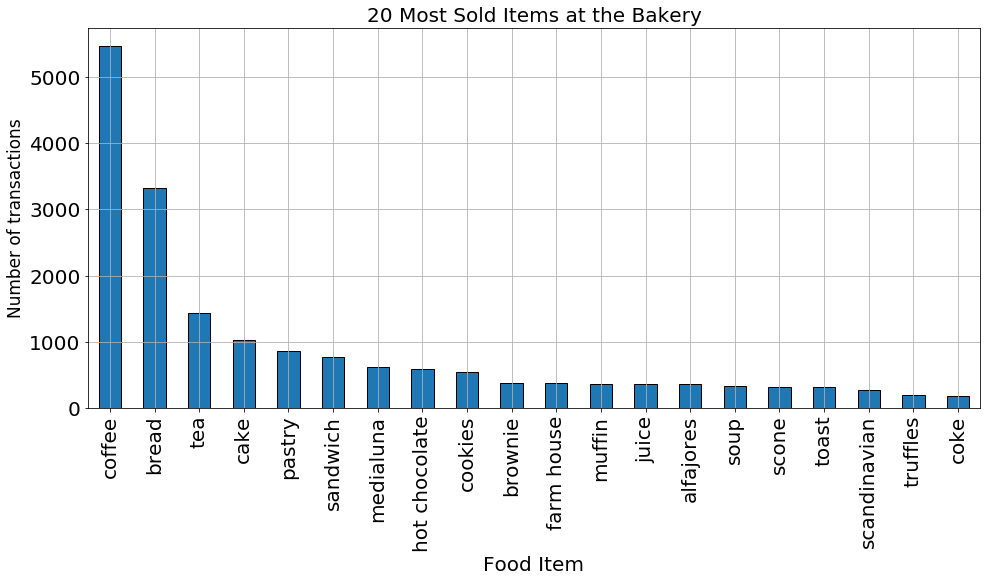

In [6]:
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

In [7]:
#Using Datetime i created a new column called "day_of_week" 
#which can give us insights on which weekday has more transactions

df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour


In [8]:
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours']]

In [9]:
df2['Counts'] = df1(['Date']).size().reset_index(name="counts")

TypeError: 'DataFrame' object is not callable

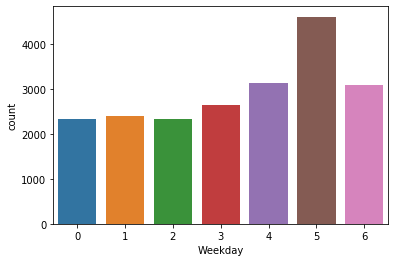

In [10]:
sns.countplot(x='Weekday',data=df1)

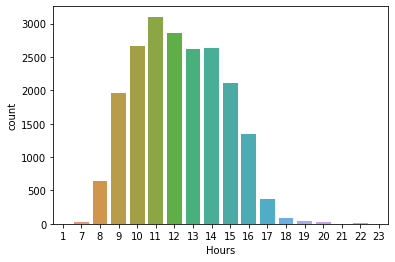

In [11]:
sns.countplot(x='Hours',data=df1)

In [12]:
#Now, we need to run apriori algorithm to get insight that if a customer buys one item which item he/she buys next.

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [13]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [14]:
hot_encoded_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [16]:
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

In [17]:
#Support is an indication of how frequently the itemset appears in the dataset.

#Confidence is an indication of how often the rule has been found to be true.

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
9,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


In [18]:
#We only want to see the rules where confidence is greater than or equal to 50% so:

rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
14,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


In [19]:
#For instance from the last rule we can see that toast and coffee are commonly bought together.
#This makes sense since people who purchase toast would like to have coffee with it.

#The support value for the this rule is 0.023666.
#This number is calculated by dividing the number of transactions containing toast divided by total number of transactions.


#The confidence level for the rule is 0.704403 which shows that out of all the transactions that contain toast ,
#70.44% of the transactions also contain coffee. 

#Finally, the lift of 1.47 tells us that coffee is 1.47 times more likely to be bought
#by the customers who buy toast compared to the default likelihood of the sale of coffee.


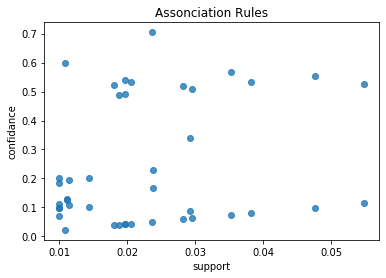

In [20]:
support = rules.as_matrix(columns=['support'])
confidence = rules.as_matrix(columns=['confidence'])
import seaborn as sns

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]
    
plt.title('Assonciation Rules')
plt.xlabel('support')
plt.ylabel('confidance')
sns.regplot(x=support, y=confidence, fit_reg=False)